# Do Diverse Cities Have Higher COVID-19 Mortality? 

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Benjamin Hinnant
- Desmond Vu
- Kayla Maldonado
- Alexander Gao
- Keshav Tiwari

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# **Research Question**


What is the relationship between the racial backgrounds and urbanization levels of western and eastern states, and what is their effect on COVID-19 mortality rates in the USA?



## Background and Prior Work


During the COVID-19 pandemic, several analyses determined that people of color (POC) were experiencing a disproportionately larger COVID-19 mortality rate than Caucasians. One report from the APM Research Lab was written by Elisabeth Gawthrop, who used state-reported data from the U.S. Centers for Disease Control and Prevention, or CDC. She determined that as of September 27 of 2023, the COVID-19 mortality rate for Black individuals was around 55% higher than the rate for Caucasian individuals. The mortality rate for Latinos was nearly 65% higher than Caucasians.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)

Another study done by Latoya Hill and Samantha Artiga used data from the CDC and the National Center for Health Statistics (NCHS). They determined that the largest differences in COVID-19 mortality rates between racial groups occurred during surges in the pandemic when the total mortality rate was particularly high. The first surge in COVID-19 deaths peaked in July 2020, and during this month, Hispanic individuals were five times more likely to die than Caucasians, American Indian or Alaska Natives (AIAN) were four times as likely to die, and Blacks were three times as likely to die. During the second surge in December 2020 and January 2021, all POC analyzed (Blacks, Hispanics, and AIAN) had higher rates of death than Caucasians.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)

These previous studies have already established that different races have different COVID-19 mortality rates.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)<sup>,</sup><a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) As a result, we now want to determine the relationship between three variables: racial background, the level of urbanization, and whether the region of interest is an eastern or western state. We then want to determine the effect of these variables on COVID-19 mortality rates. By determining if any of these variables has a significant effect on mortality rates, we hope to potentially discover trends that can guide a future pandemic response.

References

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Gawthrop, Elisabeth. “Color of Coronavirus: COVID-19 deaths analyzed by race and ethnicity — APM Research Lab.” APM Research Lab, 19 October 2023, https://www.apmresearchlab.org/covid/deaths-by-race. Accessed 25 February 2024.

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Hill, Latoya, and Samantha Artiga. “COVID-19 Cases and Deaths by Race/Ethnicity: Current Data and Changes Over Time.” KFF, 22 August 2022, https://www.kff.org/racial-equity-and-health-policy/issue-brief/covid-19-cases-and-deaths-by-race-ethnicity-current-data-and-changes-over-time/. Accessed 24 February 2024.


# **Hypothesis**


We predict that areas with a higher urbanization level will have higher COVID-19 mortality rates. Within the confined spaces of an urban region, there are more opportunities for the uninfected population to make contact with COVID-19 infected individuals. We also predict that areas with a larger population of racial minorities will have higher COVID-19 mortality rates, since these communities often have less resources available and may find it more difficult to treat every infected patient optimally. We are unsure whether eastern or western communities will have higher mortality rates, but we believe that incorporating this variable into our analysis may remove a confounding variable while uncovering interesting trends regarding the pandemic response between eastern and western communities. Combining our previous predictions, we predict that urban areas with a larger population of racial minorities will have the highest COVID-19 mortality rates, while rural areas with a smaller population of racial minorities will have the lowest COVID-19 mortality rates.  

# **Data**


## Data Overview
**Dataset #1**
- Dataset name: Provisional COVID-19 Deaths by County, and Race and Hispanic Origin
- [Link to dataset](https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-County-and-Race-and/k8wy-p9cg/about_data)
- Number of Observations: 3,687
- Number of Variables: 21

**Description:** The dataset we are utilizing to address our question is the Provisional COVID-19 Deaths by County and Race and Hispanic Origin dataset, directly sourced from the Centers for Disease Control and Prevention (CDC) website. This dataset covers the period from January 4, 2020, to September 27, 2023, collected weekly from counties across all 50 states. It comprises around 3,700 observations with string and integer data types. The dataset is mostly complete, with NaN values only present for different racial populations. Key columns in the dataset include county name, state name, total deaths from all causes, deaths involving COVID-19, a description of the level of urbanization, and percentages of each racial category (such as Asian, White, Hispanic, American Indian, etc.). Deaths involving COVID-19 are identified by the presence of an U07.1 diagnosis code assigned to a deceased patient, which is assigned only if a patient tests positive for COVID-19. The urbanization level is determined by the National Center for Health Statistics (NCHS) Urban-Rural Classification Scheme for Counties, categorizing counties into 6 urban-rural categories suitable for health analyses.

**Important Variables:**
- Percentage of Race: Indicates the proportion of each racial category affected by COVID-19 in each county.
- Urbanization level: Describes the level of urbanization of a county on a scale of 1 (large metropolitan city) to 6 (small non-core area), providing insights into how different counties address health access, resources, and disease prevention.
- State Name: The state from which the data is collected, aiding in the analysis of regional differences in COVID-19.
- Deaths by COVID-19: The number of deaths with a leading cause of COVID-19.

**Data Wrangling:** As our focus is on COVID-19 deaths, affected populations, geographic locations, and urbanization levels, this dataset provides all the necessary information to address our research question. However, we do have concerns regarding missing data on certain races due to privacy concerns and unnecessary columns that are not required for this project. To address these, we cleaned the dataset by removing columns such as total deaths and ensured that we only considered counties that reported affected racial groups. This step was crucial to ensure the validity of our analysis by including as many individuals as possible in our observations. Despite the removal of some columns, we deemed this necessary given the ample data available from various counties that included racial populations for our analysis.

## Dataset #1 Provisional COVID-19 Deaths by County, and Race and Hispanic Origin

In [8]:
# Set up
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xplotly.express as px
import pandas as pd
from scipy.stats import ttest_ind
import patsy
import statsmodels.api as sm

# Reading the CSV file
df = pd.read_csv('Provisional_COVID-19_Deaths_by_County__and_Race_and_Hispanic_Origin_20240224.csv')

# How does the file look like
df.head()

ModuleNotFoundError: No module named 'xplotly'

In [ ]:
# The next few codes is how we cleaned our dataset

# Clean Data to only include rows for deaths from COVID-19
df = df[df['Indicator'] == 'Distribution of COVID-19 deaths (%)']
df.reset_index(drop=True, inplace=True)

# Clean Data to only include coastal states(Column with East, West)
coast_states = ['WA', 'OR', 'CA', 'ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL']
df['Coast'] = df['State'].apply(lambda x: 'West' if x in ['CA', 'OR', 'WA'] else 'East')
df = df[df['State'].isin(coast_states)]
df.shape

# 170 coastal counties where theres info for Non-Hispanic Whites, Non-Hispanic Blacks, Hispanics, Non-Hispanic Asians
mask_white = df['Non-Hispanic White'].notna()
mask_black = df['Non-Hispanic Black'].notna()
mask_asian = df['Non-Hispanic Asian'].notna()
mask_hispanic = df['Hispanic'].notna()
combined_mask = mask_white & mask_black & mask_hispanic &mask_asian
num_rows_non_nan = combined_mask.sum()

# We decided to keep counties that included data for Non-Hispanic White, Black and Asians and Hispanics, to ensure 
# validity and inclusion in our analysis/data

# Drop counties where theres missing info in any of aforementioned columns
df = df[combined_mask]
df.reset_index(drop=True, inplace=True)
df['Non-White, Non-Black, Non-Hispanic, Non-Asian'] = 1 - df['Non-Hispanic White'] - df['Non-Hispanic Black'] - df['Hispanic'] - df['Non-Hispanic Asian']

# Drop unnecessary columns, Remember Data is from 01/01/2020 to 09/23/2023
df = df.drop(['Data as of', 'Start Date', 'End Date', 'Urban Rural Code', 'FIPS State', 'FIPS Code','FIPS County', 'Indicator'], axis=1)

# Rearrange the columns to have data arranged in desirable order
df = df[["State","County Name", "Coast","Total deaths", "COVID-19 Deaths","Non-Hispanic White","Non-Hispanic Black", "Hispanic", "Non-Hispanic Asian", "Non-White, Non-Black, Non-Hispanic, Non-Asian", "Non-Hispanic American Indian or Alaska Native","Non-Hispanic Native Hawaiian or Other Pacific Islander","Other","Urban Rural Description","Footnote"]]

# Because we standardized the ethnicity data above, we decide to remove all data for specific ethnicities 
# which we are not observing and only keep the ones that we described above.
df = df.drop(['Non-Hispanic American Indian or Alaska Native','Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Other', 'Footnote'], axis=1)

# Taking care of the portion of Deaths within our data and creating/adding a column to our df
df.insert(5, "Portion of Deaths due to COVID", df["COVID-19 Deaths"] / df["Total deaths"])

In [ ]:
# A view of how our cleaned dataset looks like now
df.head()

,State,County Name,Coast,Total deaths,COVID-19 Deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian",Urban Rural Description
0,CA,Alameda County,West,41916,2628,0.062697,0.312,0.191,0.239,0.219,0.039,Large central metro
1,CA,Butte County,West,9294,789,0.084893,0.790,0.015,0.119,0.041,0.035,Small metro
2,CA,Contra Costa County,West,31889,1754,0.055003,0.536,0.127,0.198,0.111,0.028,Large fringe metro
3,CA,Fresno County,West,33704,3278,0.097258,0.393,0.046,0.450,0.092,0.019,Medium metro
4,CA,Kern County,West,27860,2711,0.097308,0.373,0.058,0.505,0.040,0.024,Medium metro


### Data Cleaning

To get the data into a usable format, we first had to keep only the parts of the data that were deaths specific to COVID, as the data also included non-COVID deaths. Based on our research question, we wanted to analyze states on the east and west coast. So, we only kept the remaining data that were for counties in east and west coast states. Then, we had to analyze which parts of the data were missing. Even though there were columns for specific ethnicities such as American Indian or Native Hawaiian, a lot of counties had missing information for these columns and only had data for few columns Non-Hispanic Whites and Non-Hispanic Blacks and NaN for others. In order to standardize the data, while still having a decent number of obvservations, we decided to see how many counties had data for Non-Hispanic Whites, Non-Hispanic Blacks, Non-Hispanic Asians, and Hispanics, which was 170, and removed those which didn’t. Then, we added essentially a column that was for the proportion of the population not in those ethnicities (the remainder/other column basically). Finally, we dropped a lot of columns which were unnecessary to our data, such as codes for counties and states (which do not provide as easily understandable info as county names and state names) and date-range, which was standard across the whole data set (1/2020 to 9/2023). We also removed total deaths, as we only cared about COVID-19 deaths. Also, one aspect we need to be aware of is that because a lot of counties have a higher population than others, naturally, they will have a higher number of COVID deaths. Thus, we need to make sure that we take into account the covid death rate in order to truly understand what factors cause a higher percentage of COVID deaths. To this, we add a column called COVID death rate, which is the number of COVID deaths divided by the total number of deaths.

# **Results**

Before we delve into the EDA, it is important to note that our data comprises of small units that cumulate together to answer our research question. Therefore, creating the characteristics table in order to understand our data better first requires the collation of county-wise mortality counts into state and coastal levels of granularity. Moreoever, all data must also be reorganized as per differing Rural Urban Descriptions, in order for us to better understand our dataset's ability to explore the relationships between different urbanization levels and racial backgrounds in the context of COVID-19 Deaths. Here is an outline of our overall EDA:
- What distributions do your variables take?
- Are there any outliers?
- Relationship between variables?



## Granularity Analysis
- What approaches was used? Why?
    - The point of shifting from one level of granularity to another was to be able to create a larger picture out of our data that directly answers our research question. Specifically, by 'grouping together' county-based data, we gained a much deeper clarity of the distributions undertaken by our variables. The construction of our important variables was signficant in creating racial background data on COVID mortality rates scaled to population and total deaths (to account for deaths not caused by COVID-19). Moreover, the collation of such data eases the process of visualization construction and analysis later on at a macro-level. It helps the reader in understanding the shape, scope and faithfulness of the data, before we explore variability and central tendency in later sections.    
- What were the results and interpretations?
    - As can be seen in the tables, the east coast seemingly had more deaths than the west coast and there racial background proportions were significantly different to each other. Some of these discrepancies in proportions were more intuitive than others, such as a higher proportion of Hispanics on the West Coast, possibly through its proximity to Latin American Countries. For the urbanization levels of analyses, it is evident that the 'larger' urbanization gets, the number of COVID 19 Deaths increased significantly.    

### Shifting from county to coastal levels of granularity

In [ ]:
# Combining all county wise data into statewise data, specifically summing together COVID-19 Deaths and Total deaths columns.  
state_deaths = df.groupby('State').agg({'COVID-19 Deaths': 'sum'})
state_total_deaths = df.groupby('State').agg({'Total deaths': 'sum'})
# specifiying different a list of racial backgrounds for data handling later
race_columns = ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Non-Hispanic Asian', 'Non-White, Non-Black, Non-Hispanic, Non-Asian']
race_deaths = pd.DataFrame()                # Creating a single intermediary dataframe to store death per race per state 
for col in race_columns:                    # iterating through the list of racial backgrounds
    race_deaths[col] = df[col] * df['COVID-19 Deaths']            # multiplying proportions of death per race to total COVID-19 deaths in order to get number of deaths per race
state_race_deaths = race_deaths.groupby(df['State']).sum()        # summing number of deaths per race per county into statewise (the first shift in granularity)
state_race_death_proportions = state_race_deaths.div(state_deaths['COVID-19 Deaths'], axis=0)   # calculatiing death proportions per race at a state level of granularity
state_df = pd.concat([state_deaths, state_race_death_proportions], axis=1)     # concatenating dataframes

state_df.insert(1, 'Total deaths', state_total_deaths['Total deaths'])
state_df.insert(2, 'Portion of Deaths due to COVID', state_deaths['COVID-19 Deaths']/state_total_deaths['Total deaths']) # creating a scaled calculation of how many deaths were due to COVID-19 


# Combining all county wise data into coast data, specifically summing together COVID-19 Deaths and Total deaths columns.  
coast_deaths = df.groupby('Coast').agg({'COVID-19 Deaths':'sum'})
coast_total_deaths = df.groupby('Coast').agg({'Total deaths': 'sum'})
race_deaths_coast = pd.DataFrame()         
for col in race_columns:                    # iterating through the list of racial backgrounds
    race_deaths_coast[col] = df[col] * df['COVID-19 Deaths']        # multiplying proportions of death per race to total COVID-19 deaths in order to get number of deaths per race   
coast_race_deaths = race_deaths_coast.groupby(df['Coast']).sum()    # summing number of deaths per race per county into coastwide (the second shift in granularity)
coast_race_death_proportions = coast_race_deaths.div(coast_deaths['COVID-19 Deaths'], axis=0)    # calculating death proportions per race at a coast level of granularity
coast_df = pd.concat([coast_deaths, coast_race_death_proportions], axis=1)      # concatenating dataframes
coast_df.insert(1, 'Total deaths', coast_total_deaths['Total deaths'])
coast_df.insert(2, 'Portion of Deaths due to COVID', coast_deaths['COVID-19 Deaths']/coast_total_deaths['Total deaths']) # creating a scaled calculation of how many deaths were due to COVID-19


location_df = pd.concat([coast_df, state_df], axis=0)
location_df = location_df.round(2)          # rounding to easily comprehensible decimal places        

coastal_mean = pd.DataFrame(coast_df[race_columns].mean())          # finding the mean for coastal data
coastal_mean = coastal_mean.round(2)
location_df.loc[['East', 'West']].head()    # display only coastal data 


NameError: name 'df' is not defined

In order to compare east and west coast states, we must transform our data from county-wise proportions to a much higher level of granularity. By doing that, we can much easier observe patterns/comprehend if there is any preliminary relationships/distributions that can be seen in our cleaned dataset.

### Shifting from county to urbanization levels of granularity

In [ ]:
# Combining all county wise data, specifically summing together COVID-19 Deaths and Total deaths columns, and categorizing it all into urbanization level data.  
urban_deaths = df.groupby('Urban Rural Description').agg({'COVID-19 Deaths': 'sum'}) 
urban_total_deaths = df.groupby('Urban Rural Description').agg({'Total deaths': 'sum'})

# specifiying different a list of racial backgrounds for data handling later
race_columns = ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Non-Hispanic Asian', 'Non-White, Non-Black, Non-Hispanic, Non-Asian']

# Creating a single intermediary dataframe to store death per race per urbanization level and iterating through the list of racial backgrounds
race_deaths = pd.DataFrame()       
for col in race_columns:           
    race_deaths[col] = df[col] * df['COVID-19 Deaths']  # multiplying proportions of death per race to total COVID-19 deaths in order to get number of deaths per race
urban_race_deaths = race_deaths.groupby(df['Urban Rural Description']).sum()  # summing number of deaths per race per county into urbanization level of granularity 
urban_death_proportions = urban_race_deaths.div(urban_deaths['COVID-19 Deaths'], axis=0)  # using .div to divide in order to avoid division by null/zero value
urban_df = pd.concat([urban_deaths, urban_death_proportions], axis=1)  # concatenating dataframes 

urban_df.insert(1, 'Total deaths', urban_total_deaths['Total deaths'])
urban_df.insert(2, 'Portion of Deaths due to COVID', urban_deaths['COVID-19 Deaths']/urban_total_deaths['Total deaths']) # scaled calculation of how many deaths were due to COVID-19



urban_mean = pd.DataFrame(urban_df[race_columns].mean())  # finding the mean for urbanizaization-based data
urban_mean = urban_mean.round(2)  # rounding to easily comprehensible decimal places
urban_df = urban_df.round(2)                    


urban_df.head() # display urbanization level data

,COVID-19 Deaths,Total deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian"
Urban Rural Description,,,,,,,,
Large central metro,191458,1898063,0.10,0.42,0.18,0.30,0.09,0.02
Large fringe metro,127965,1328164,0.10,0.63,0.16,0.15,0.05,0.01
Medium metro,99183,1078031,0.09,0.70,0.13,0.14,0.03,0.01
Small metro,6360,62403,0.10,0.71,0.08,0.17,0.03,0.01


Upon running some basic operations on our cleaned dataset, we now have a clearer picture of it. Through the operations, we were able to collate county-wide data into state and then eventually coast-based data on how differing racial backgrounds contribute to COVID-19 Deaths. By cumulating all county-based proportions into coast-based and urbanization-based proportions, the proportion values calculated were a fair indication of the central tendencies of the data. As for our cleaned dataset, we will explore central tendencies and variabilities through the following discussion on distributions. 


## West Coast V.S. East Coast Analysis
- What approaches were used? Why?
  - For this section, we decided to use a geospatial map, boxplots, and a t-test. The geospatial map and box plot were meant to provide a better visualization of total and proportional deaths caused by COVID-19. The map offers a simplified view, allowing viewers to easily understand the regions we are analyzing (East and West coasts) and the corresponding death tolls using bubble map visuals and colors. On the other hand, the box plot offers a different perspective on the data, enabling viewers to see the overall impact of deaths rather than individual states as shown in the geospatial map, while also highlighting any outliers. Additionally, the t-test provides further confirmation of the relationship of COVID-19 deaths between the West and East coasts.
- What were the results and interpretations?
  - The geospatial map illustrated how COVID-19 impacted regions, with states like California and Florida being the most affected. It can also be interpreted that highly urban and densely populated states such as California, Florida, New York, and New Jersey are more likely to experience higher COVID-19 death rates than states with lower urban populations. In the boxplots, insights into the central tendency (median values) revealed that, on average, there were slightly less than 5,000 deaths for both the West and East coasts. Additionally, it provided a glimpse into the variability among our data, showing that the East coast had a greater variability of deaths compared to the West coast. The t-test results indicated a significant difference in COVID-19 death rates between the East and West coasts, with a p-value of 0.01.

### Proportional COVID Deaths vs Coast Geospatial Map


In [ ]:
# Group the deaths by state
df_grouped = df.groupby('State', as_index=False)['Portion of Deaths due to COVID'].sum()

# Create the plots
fig = px.scatter_geo(df_grouped, 
                     locations="State", 
                     locationmode="USA-states",
                     color="Portion of Deaths due to COVID",
                     hover_name="State",
                     size="Portion of Deaths due to COVID",
                     projection="albers usa",
                     title="COVID-19 Deaths: West V.S. East Coast",
                     color_continuous_scale='Magma_r',
                     width=900,  # Set width of the graph
                     height=700  # Set height of the graph                     
                    )

# Fix the map
fig.update_geos(
    fitbounds="locations",
    visible=False,
    showcountries=True, 
    showsubunits=True,  
    subunitcolor="gray",
    showland=True,
    landcolor='rgb(217, 217, 217)',
    countrycolor="gray"  # Color of country borders
)

# Put borders onto circles
fig.update_traces(marker=dict(line=dict(width=1, color='rgb(0,0,0)')))

# Center the title
fig.update_layout(title_x=0.5)



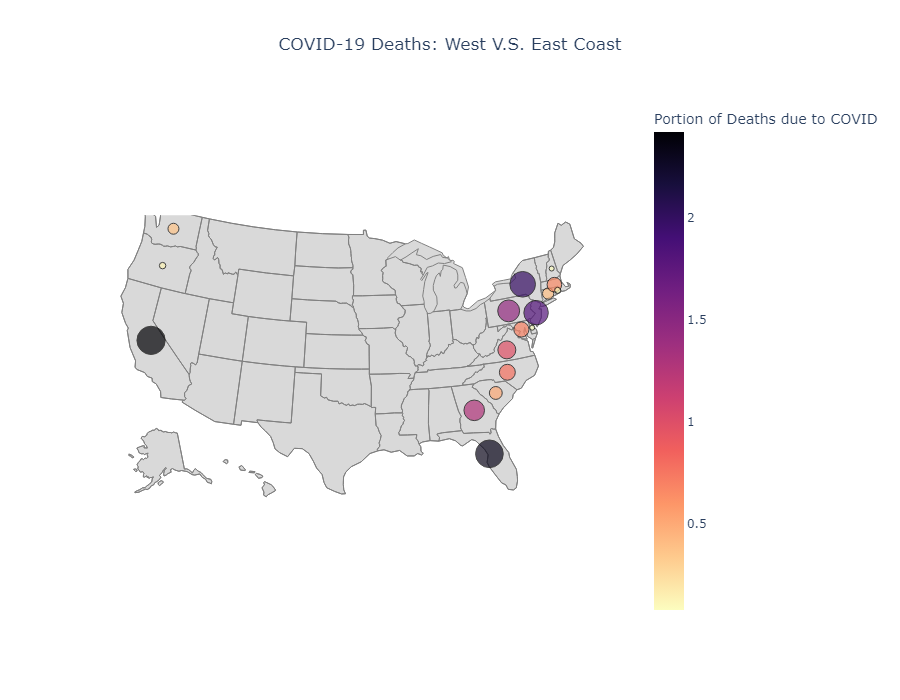

The geospatial map illustrates the proportion of deaths in each state. It is evident from the map that California, Florida, New Jersey, and New York exhibit some of the highest COVID death rates. This leads us to infer that states with a higher population density or a larger urban area tend to have a higher death rate compared to other states. Also note that Maine is not included as part of the East coast as there is not enough data or data about COVID deaths was missing in the dataset. 

###  Total COVID Deaths v.s. Coast Boxplot

Text(0.5, 1.0, 'COVID-19 Deaths for West and East Coast')

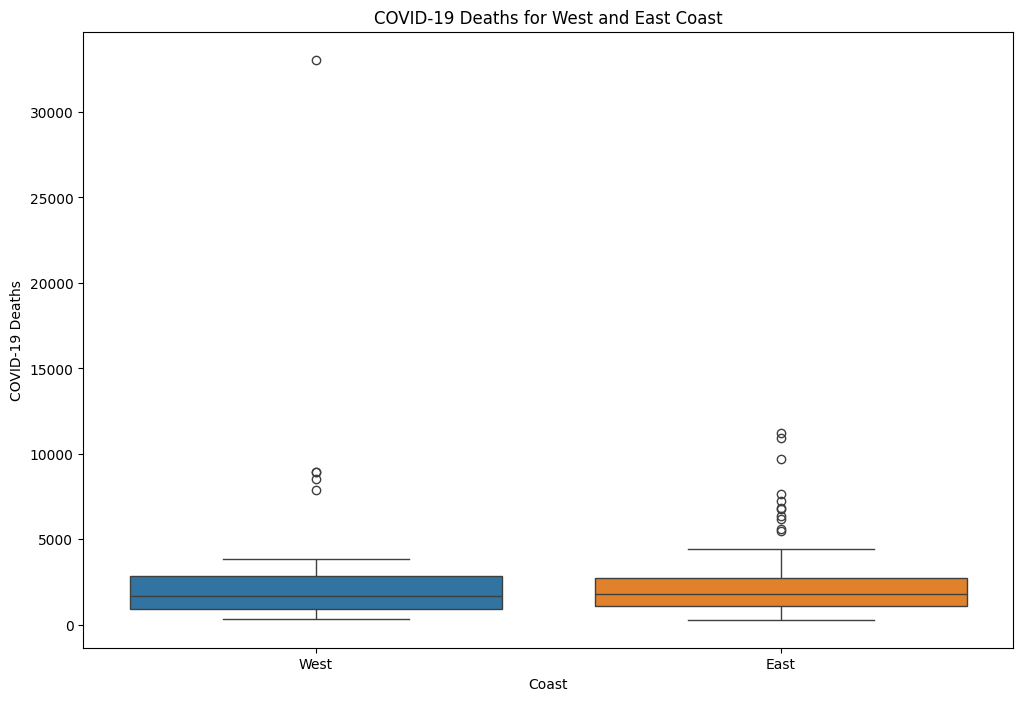

In [ ]:
plt.figure(figsize = (12, 8))

boxplot = sns.boxplot(data = df, y = 'COVID-19 Deaths', x = 'Coast', hue = 'Coast')
boxplot.set_xlabel('Coast')
boxplot.set_title('COVID-19 Deaths for West and East Coast')

Looking at this graph, we can see the general distributions of COVID-19 Deaths between the West and East Coast. We can see that the East Coast has more outliers than the West Coast. We can also see that the interquartile range between the West and East Coast are fairly similar. However, based on this information alone, it is hard to visualize the actual difference or meaningful trends between these two populations.

### COVID Death Proportion in Relation to Coast T-test



In [ ]:
west_df = df[df['Coast'] == 'West']
east_df = df[df['Coast'] == 'East']

t_statistic, p_value = ttest_ind(west_df['Portion of Deaths due to COVID'], east_df['Portion of Deaths due to COVID'])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -3.801220815269658
p-value: 0.00020113242613057811


In order to quantify that living in the West vs East Coast actually causes a significant difference in the portion of deaths due to COVID, let's use a t-test to test the difference between these two groups. This works well with the given data because we would like to see if there really is a statistical difference between East and West Coast COVID Rates and the null hypothesis of the trend being caused by random chance. Since our p_value is very small, below the threshold of 0.01, this means that there is a statistical difference between COVID death rates on the East Coast vs the West Coast and that the difference is not due to random chance.

## Urbanization level Analysis

Now, let's take a look at our four different types of urbanization areas, which are Small Metro, Medium Metro, Large Fringe Metro and Large Central Metro and how they affect COVID total deaths and COVID death rates.
- What approaches were used? Why?
  - The approaches used for this section were primarily bar plots and a t-test. The bar plots provided an easier way of visualizing the urbanization levels of the West and Eastern States: small, medium, large centro, and large fringe, against total and proportional COVID deaths. Meanwhile, the t-test was employed to determine if there is a relationship between COVID deaths and a county's urbanization level.

- What were the results and interpretations?
  - Analysis of the bar plots revealed that regions with lower urbanization levels on the West and East coasts experienced a similar impact in terms of total and proportional deaths. Interestingly, discrepancies in the data emerged when examining higher urbanization levels. The West coast exhibited a higher total COVID death rate, while the East coast showed a higher proportional COVID death rate. However, this variance could potentially be attributed to our dataset encompassing more states from the East coast than the West coast, as well as the differing number of counties with higher or lower urbanization levels within each state or coast. In the t-test, we discovered that the p-value at a higher urbanization level was too high to establish significance, thus a definitive relationship cannot be determined. However, at a smaller urbanization level, the results were closer to significance, with a p-value of 0.45. With a larger dataset, there is a possibility of identifying a significant relationship between COVID-19 deaths on the West and East coasts at a smaller urbanization level.

### Total COVID Deaths vs Urbanization Level and Coast

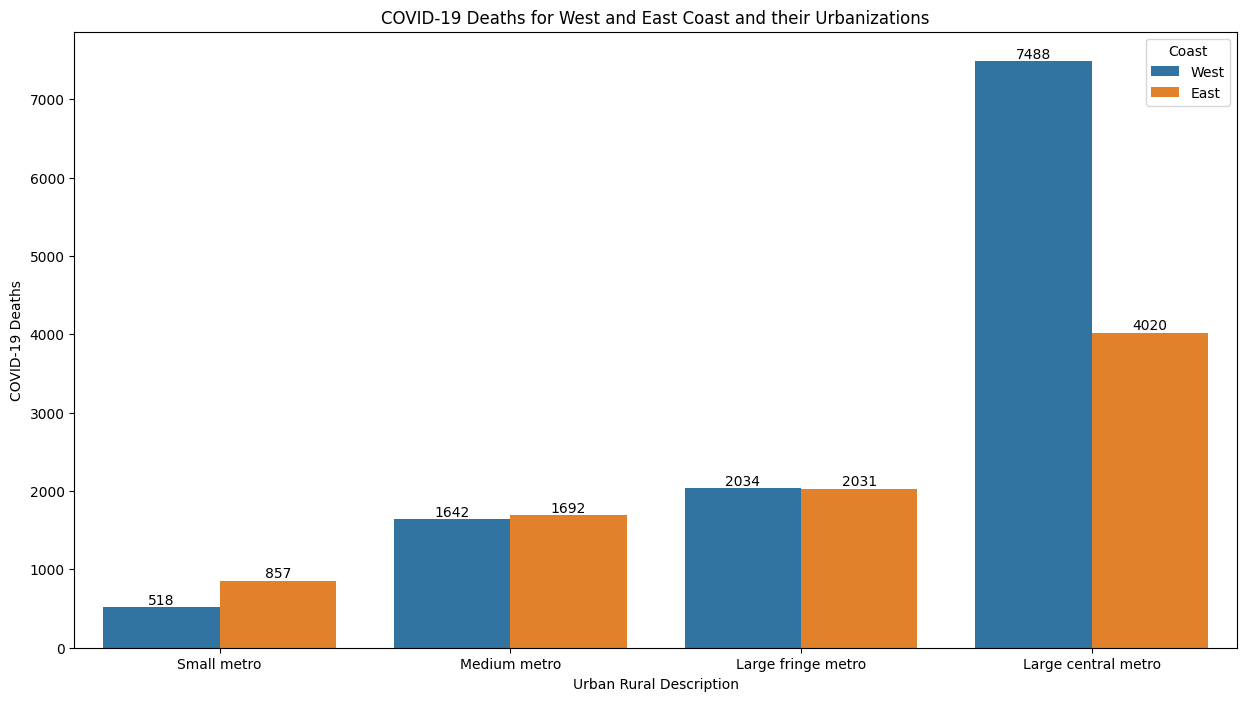

In [ ]:
plt.figure(figsize=(15,8))
barplot = sns.barplot(data = df, y = 'COVID-19 Deaths', x = 'Urban Rural Description', hue = 'Coast', 
                      order = ['Small metro', 'Medium metro', 'Large fringe metro', 'Large central metro'], errorbar =None )
barplot.set_title('COVID-19 Deaths for West and East Coast and their Urbanizations')

#Adding numbers to the each bar
for i in barplot.containers:
    barplot.bar_label(i, fmt='\n%.0f')

Looking at this graph, we can see that the West Coast has less COVID-19 Deaths for small metro, similar COVID-19 Deaths for medium metro and large fringe metro, and more COVID-19 Deaths for large central metro when compared to the East Coast. However, this does intituively make sense, because if we are only looking at total deaths, naturally large central metros will have a higher number of COVID deaths.

### Proportion of COVID Deaths vs Urbanization Level


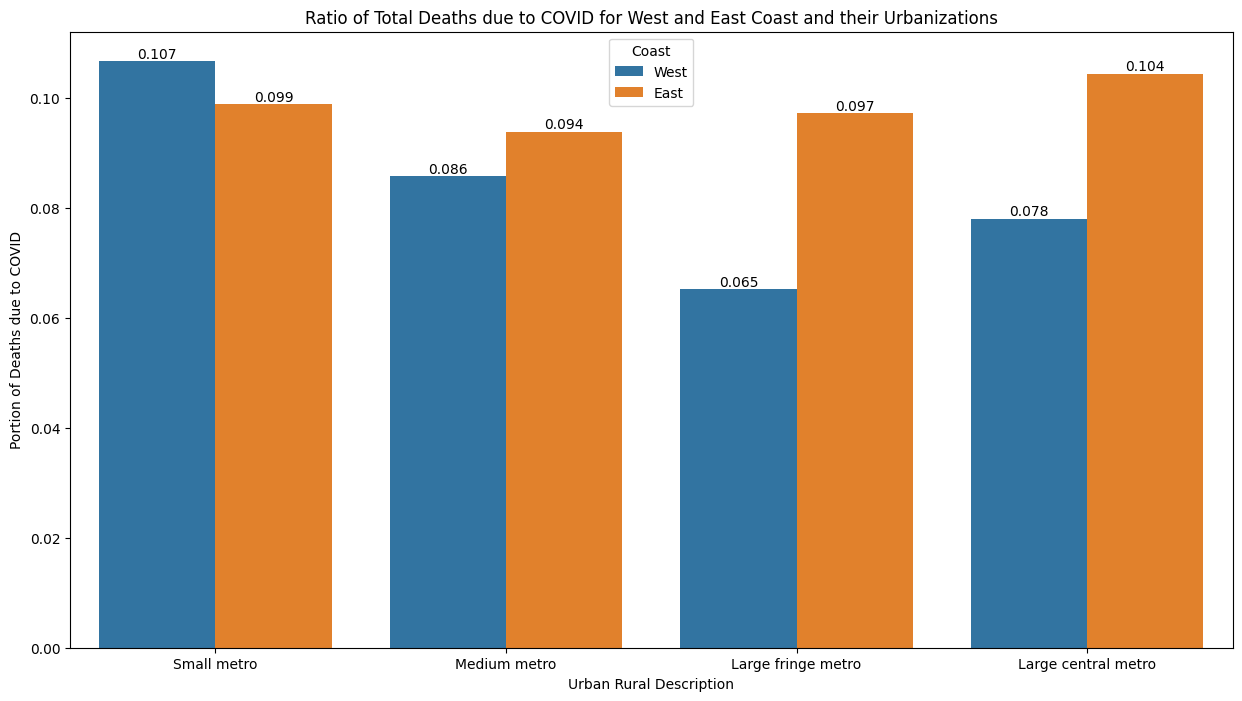

In [ ]:
plt.figure(figsize=(15,8))
barplot = sns.barplot(data = df, y = 'Portion of Deaths due to COVID', x = 'Urban Rural Description', hue = 'Coast',
                      order = ['Small metro', 'Medium metro', 'Large fringe metro', 'Large central metro'], errorbar =None )
barplot.set_title('Ratio of Total Deaths due to COVID for West and East Coast and their Urbanizations')

#Adding numbers to the each bar
for i in barplot.containers:
    barplot.bar_label(i, fmt='\n%.3f')

Interestingly enough, the East Coast seems to have a higher percent of deaths caused by COVID mostly except for small metros, where West Coast has a higher portion of COVID deaths. The difference between East and West Coast is most noticeable in the large fringe metro. Again, West Coast counties tend to have more outliers than East Coast.


### Proportion of COVID Deaths  vs Urbanization Level (combined)

To start off, we want to see if there is a significant level of difference WITHIN the same urbanization of counties but with different coasts (i.e. small metro West vs East, medium metro West vs East etc.). Therefore, we can run a t_test for all four of our urbanization types. One slight issue with our analysis is that there is a large disparity in the number of observations for some of our urbanization levels. For example, there are only 4 small west metros and 5 small east metros. If we were to compare them against each other, the small number of obversations could be swung heavily by outliers. Thus, we can commbine our small and medium metros and large fringe and large central and compare these counties as "Smaller vs Larger Metro". This would result in a broader comparison, but a better understanding of these trends. In order to make our lives easier when plotting, we can modify the df directly by adding an additional column that shows the generalization of  "Smaller" and "Larger" urban level.

In [ ]:
#Small Metro
west_small_df = df[(df['Urban Rural Description'] == 'Small metro') & (df['Coast'] == 'West')]
east_small_df = df[(df['Urban Rural Description'] == 'Small metro') & (df['Coast'] == 'East')]

west_small_count = west_small_df.shape[0]
east_small_count = east_small_df.shape[0]
print("Small West Metro Count:", west_small_count)
print("Small East Metro Count:",  east_small_count)

#Medium Metro
west_medium_df = df[(df['Urban Rural Description'] == 'Medium metro') & (df['Coast'] == 'West')]
east_medium_df = df[(df['Urban Rural Description'] == 'Medium metro') & (df['Coast'] == 'East')]

west_medium_count = west_medium_df.shape[0]
east_medium_count = east_medium_df.shape[0]
print("Medium West Metro Count:", west_medium_count)
print("Medium East Metro Count:", east_medium_count)

#Large Fringe Metro
west_large_fringe_df = df[(df['Urban Rural Description'] == 'Large fringe metro') & (df['Coast'] == 'West')]
east_large_fringe_df = df[(df['Urban Rural Description'] == 'Large fringe metro') & (df['Coast'] == 'East')]

west_large_fringe_count = west_large_fringe_df.shape[0]
east_large_fringe_count = east_large_fringe_df.shape[0]
print("Large Fringe West Metro Count:", west_large_fringe_count)
print("Large Fringe East Metro Count:", east_large_fringe_count)

# Large Central Metro
west_large_central_df = df[(df['Urban Rural Description'] == 'Large central metro') & (df['Coast'] == 'West')]
east_large_central_df = df[(df['Urban Rural Description'] == 'Large central metro') & (df['Coast'] == 'East')]

west_large_central_count = west_large_central_df.shape[0]
east_large_central_count = east_large_central_df.shape[0]
print("Large Central West Metro Count:", west_large_central_count)
print("Large Central East Metro Count:", east_large_central_count)

# Combining small & medium metro and large centro & large fringe to reduce outlier that skew our data 
# We also labeled the resulting combination 'smaller' and 'larger' for ease of understanding 
west_smaller_df = pd.concat([west_small_df, west_medium_df])
west_larger_df = pd.concat([west_large_fringe_df, west_large_central_df])

east_smaller_df = pd.concat([east_small_df, east_medium_df])
east_larger_df = pd.concat([east_large_fringe_df, east_large_central_df])

west_smaller_df = west_smaller_df.reset_index(drop=True)
west_larger_df = west_larger_df.reset_index(drop=True)
east_smaller_df = east_smaller_df.reset_index(drop=True)
east_larger_df = east_larger_df.reset_index(drop=True)

# Applying a new column to the dataframe that has the a general discription of the urbanization level for each state (as seen in the previous code)
df['General Urbanization'] = df['Urban Rural Description'].apply(lambda x: 'Small/Medium Metro' if x in ['Small metro', 'Medium metro'] else 'Large Fringe/Central Metro')


Small West Metro Count: 4
Small East Metro Count: 5
Medium West Metro Count: 13
Medium East Metro Count: 46
Large Fringe West Metro Count: 9
Large Fringe East Metro Count: 54
Large Central West Metro Count: 10
Large Central East Metro Count: 29


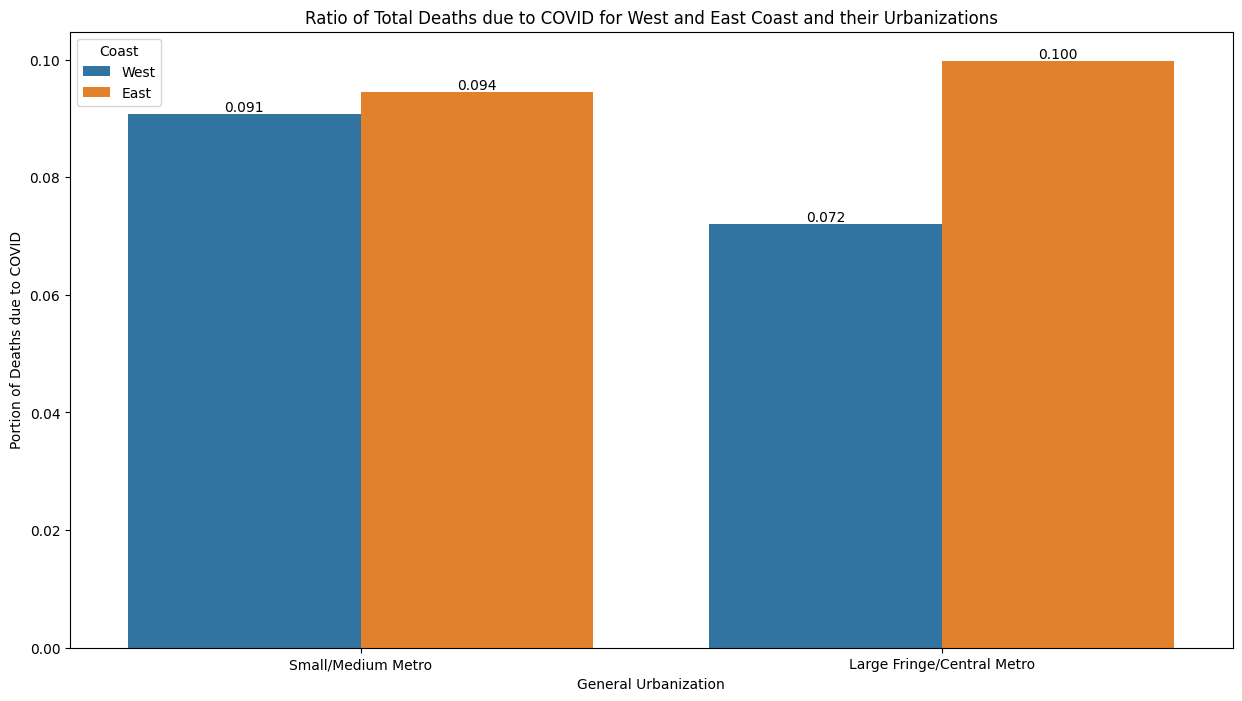

In [ ]:
plt.figure(figsize=(15,8))
barplot = sns.barplot(data = df, y = 'Portion of Deaths due to COVID', x = 'General Urbanization', hue = 'Coast', 
                      order = ['Small/Medium Metro', 'Large Fringe/Central Metro'], errorbar =None )
barplot.set_title('Ratio of Total Deaths due to COVID for West and East Coast and their Urbanizations')

#Adding numbers to the each bar
for i in barplot.containers:
    barplot.bar_label(i, fmt='\n%.3f')

### Urbanization Level (combined) T-test
Now that we have combined our data in order to reduce outliers, it seems that small/medium metros are very similar in terms of death rates on the East and West Coast. On the other hand, large fringe/central metros have a significantly higher death rate on the East Coast. Let's run a T-Test to see if these results are significant.

In [ ]:
#Small Medium Analysis
t_statistic_1, p_value_1 = ttest_ind(west_smaller_df['Portion of Deaths due to COVID'], east_smaller_df['Portion of Deaths due to COVID'])
print("Small/Medium Statistics")
print("t-statistic:", t_statistic_1)
print("p-value:", p_value_1)

#Large Fringe/Central Analysis
t_statistic_2, p_value_2 = ttest_ind(west_larger_df['Portion of Deaths due to COVID'], east_larger_df['Portion of Deaths due to COVID'])
print("\n\nLarge Fringe/Central Statistics")
print("t-statistic:", t_statistic_2)
print("p-value:", p_value_2)

Small/Medium Statistics
t-statistic: -0.7216757965226612
p-value: 0.473042849033364


Large Fringe/Central Statistics
t-statistic: -4.190952786211244
p-value: 6.002924693847406e-05


Based on these t-values, our p-value for Large Metros in the East vs West Coast is very low, at around 6 e^-5, so there is a very big statistical difference between these groups. Also, our p-value for Small/Medium Metros in the East vs West Coast is slightly smaller than the general threshold of 0.05 which means our p-value for small/medium metros is significant. However, since it is a relatively larger metro, there is not as much of a difference between small/medium metros between the coasts as there are for larger metros. Thus, while it is hard to determine if small and medium metros are different in the East vs West Coast, there seems to be a lot higher portion of deaths in the Large metros in the East vs the West.

## Racial Background Analysis
Let's explore even deeper by adding racial background and observe what their effect is to COVID-19 mortality rates.
- What approaches was used? Why?
  - The approaches used for this section was visualizing the data through barplots, homoscedastic testing, and Linear Regression. The barplots made it easy to visualize how each racial background was affected depending on the urbanization and which coast they lived in. Homoscedastic testing was done to ensure that Linear Regression was the right approach, ensuring that we can find some relationship between a racial background's population and their effect on the percentage of deaths due to COVID-19. Linear Regression was utilized to quantify the relationship between a specific racial background's population rate and the percentage of deaths due to COVID-19.
- What were the results and interpretations?
  - Looking at the bar plot, we can see that the racial background's proportion to COVID-19 deaths varied from urbanization and state, such that all racial backgrounds with the exception of Non-Hispanic White had a higher proportion in large fringe / central metros when compared to small / medium fringe metros. When comparing coasts, the West Coast had a higher proportion rate for all racial backgrounds but Non-Hispanic White and Non-Hispanic Black. Due to the limitations of our dataset, we could only do homoscedastic testing on Non-Hispanic Whites and Hispanics. In the homoscedastic testing for Non-Hispanic White, we found that there was enough homoscedasticity to use Linear Regression but when it came to testing for Hispanic, we found that there was not enough homoscedasticity to use Linear Regression. When looking at the Linear Regression for Non-Hispanic White proportion of COVID-19 deaths and percentage of deaths due to COVID-19, we found that counties with a higher Non-Hispanic White death rate had a lower percentage of deaths due to COVID-19. In other words, there is a negative correlation between Non-Hispanic White proportion to COVID-19 deaths and percentage of deaths due to COVID-19.

### Proportion of Racial Categories vs Urbanization Level
From this point on we will rename 'Non-White, Non-Black, Non-Hispanic, Non-Asian' to be Other to prevent any cluttering in our visualizations.

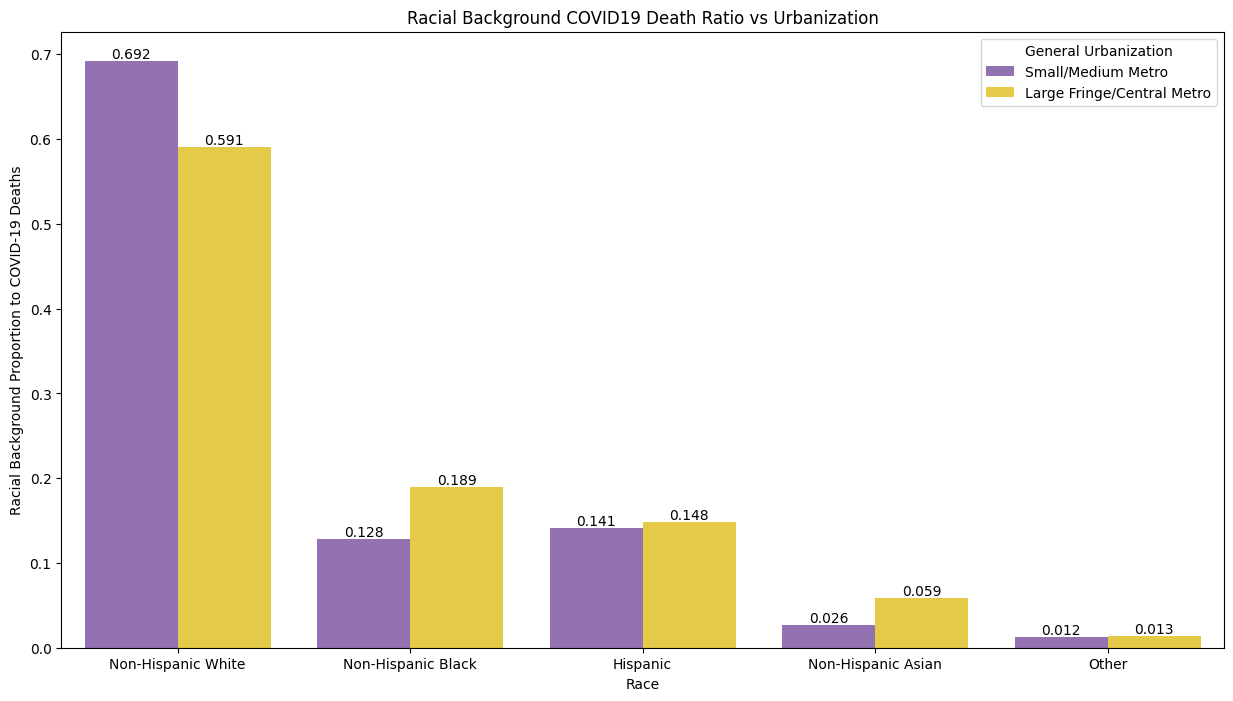

In [ ]:
# Before we do any visualizations, we need to modify our dataframe such that instead of the racial background COVID-19 death ratios are in multiple columns, we will put it in a singular column
df.rename(columns={'Non-White, Non-Black, Non-Hispanic, Non-Asian': 'Other'}, inplace=True)

dropped_columns = ['State', 'County Name', 'Total deaths', 'COVID-19 Deaths', 'Portion of Deaths due to COVID', 'Urban Rural Description', 'Coast']
df_clean = df.copy().drop(dropped_columns, axis = 1)
dfm = pd.melt(df_clean, id_vars = ['General Urbanization'], var_name = 'Race', value_name = 'Racial Background Proportion to COVID-19 Deaths')
dfm.head()

# Color Palette
palette = [sns.color_palette()[4], sns.color_palette("Set2")[5]]

# Now we do the visualization here with our modified dataframe.
plt.figure(figsize=(15,8))
barplot = sns.barplot(data = dfm, y = "Racial Background Proportion to COVID-19 Deaths", x = 'Race', 
                      hue_order = ['Small/Medium Metro', 'Large Fringe/Central Metro'],
                      hue = 'General Urbanization', errorbar =None, palette = palette)
barplot.set_title('Racial Background COVID19 Death Ratio vs Urbanization')

#Adding numbers to the each bar
for i in barplot.containers:
    barplot.bar_label(i, fmt='\n%.3f')

Looking at the graph, we can see that Large Fringe / Central Metro has a higher proportion to COVID-19 deaths for all races with the exception of Non-Hispanic White. This could possibly imply that due to counties have a higher urbanization level, will have a more diverse population, resulting in a more diverse of the population getting infected by COVID-19

###  Proportion of COVID Deaths by each Racial Background vs East and West Coast

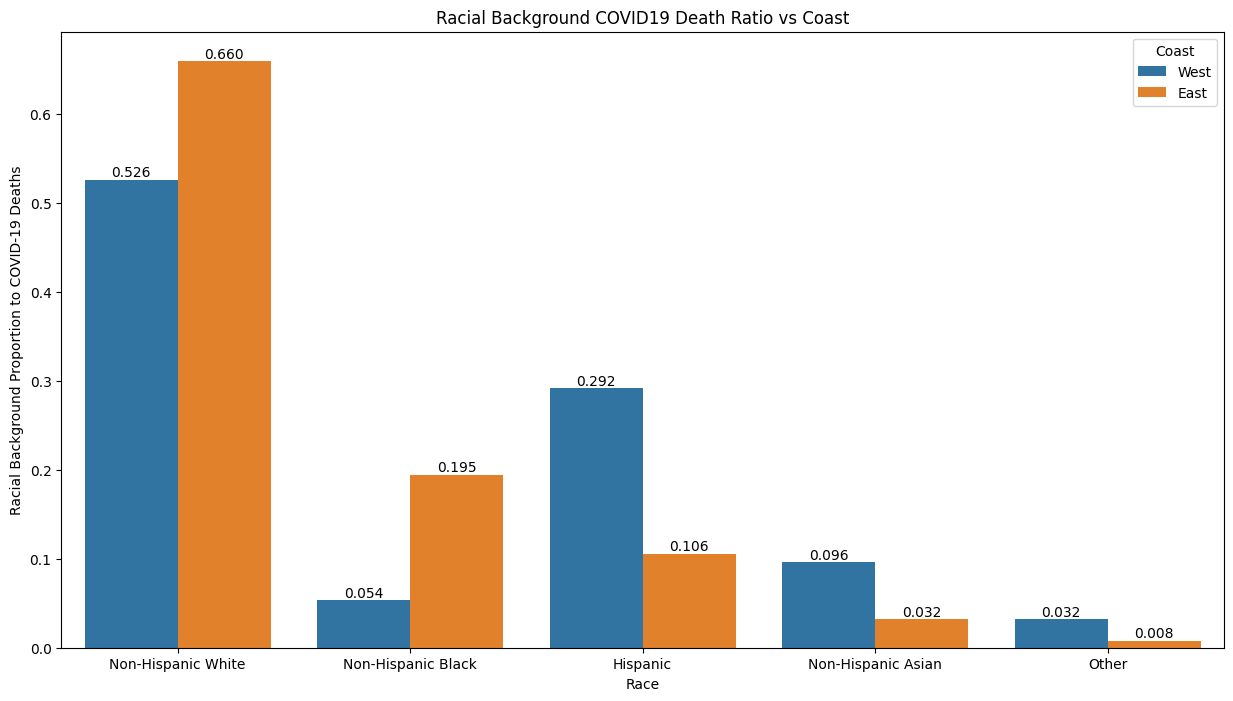

In [ ]:
# Before we do any visualizations, we need to modify our dataframe such that instead of the racial background COVID-19 death ratios are in multiple columns, we will put it in a singular column
dropped_columns = ['State', 'County Name', 'Total deaths', 'COVID-19 Deaths', 'Portion of Deaths due to COVID', 'Urban Rural Description', 'General Urbanization']
df_clean = df.copy().drop(dropped_columns, axis = 1)
dfm = pd.melt(df_clean, id_vars = ['Coast'], var_name = 'Race', value_name = 'Racial Background Proportion to COVID-19 Deaths')
dfm.head()

# Now we do the visualization here with our modified dataframe.
plt.figure(figsize=(15,8))
barplot = sns.barplot(data = dfm, y = "Racial Background Proportion to COVID-19 Deaths", x = 'Race', hue = 'Coast', errorbar =None )
barplot.set_title('Racial Background COVID19 Death Ratio vs Coast')

#Adding numbers to the each bar
for i in barplot.containers:
    barplot.bar_label(i, fmt='\n%.3f')

When comparing the West Coast and East Coast for racial background death ratios, we can see that the West Coast has a higher ratio for Hispanic, Non-Hispanic Asian, and Other while the East Coast has a higher ratio for Non-Hispanic Black and Non-Hispanic White.

### Proportion of COVID Deaths and Race Categories: Linear Regression

For this section, our focus is on exploring the relationship between the Proportion of COVID Deaths and Racial Categories. However, due to the limited availability of data for many groups, even after thorough cleaning of the original dataset, we are unable to analyze the relationship for all racial categories. As a result, we will concentrate our analysis on Non-Hispanic Whites and Hispanics, the two groups with the most substantial amount of data available. It is crucial to emphasize that the selection of these groups is not intended to assign blame or misrepresent any racial category. Rather, our choice is solely based on the availability of sufficient data for these groups, allowing for a proper analysis.


In [ ]:
# Convert the "Non-Hispanic White" and "Portion of Deaths due to COVID" column to whole numbers for easy interpretation
reg_df = df.copy()
reg_df["Portion of Deaths due to COVID"] = df["Portion of Deaths due to COVID"] * 100
reg_df["Non-Hispanic White"] = df["Non-Hispanic White"] * 100
reg_df["Non-Hispanic Black"] = df["Non-Hispanic Black"] * 100
reg_df["Hispanic"] = df["Hispanic"] * 100
reg_df["Non-Hispanic Asian"] = df["Non-Hispanic Asian"] * 100
reg_df["Other"] = df["Other"] * 100
reg_df["Non-White"] = (1 - df["Non-Hispanic White"]) * 100

# Take a look at what changed
reg_df.head()

,State,County Name,Coast,Total deaths,COVID-19 Deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,Other,Urban Rural Description,General Urbanization,Non-White
0,CA,Alameda County,West,41916,2628,6.269682,31.2,19.1,23.9,21.9,3.9,Large central metro,Large Fringe/Central Metro,68.8
1,CA,Butte County,West,9294,789,8.489348,79.0,1.5,11.9,4.1,3.5,Small metro,Small/Medium Metro,21.0
2,CA,Contra Costa County,West,31889,1754,5.500329,53.6,12.7,19.8,11.1,2.8,Large fringe metro,Large Fringe/Central Metro,46.4
3,CA,Fresno County,West,33704,3278,9.725849,39.3,4.6,45.0,9.2,1.9,Medium metro,Small/Medium Metro,60.7
4,CA,Kern County,West,27860,2711,9.730797,37.3,5.8,50.5,4.0,2.4,Medium metro,Small/Medium Metro,62.7


After comparing the difference in means between COVID-19 death rate and racial background, we wanted to determine the effect of racial backgrounds on COVID-19 death rates across counties using linear regression.

##### Looking at Proportion of COVID Deaths and Non-Hispanic Whites: Linear Regression

 For this section of the linear regression our null hypothesis is that being Non-Hispanic White has no effect on COVID-19 death rates, and our alternative hypothesis is that being Non-Hispanic White has a significant difference on COVID-19 death rates. We alsp converted our columns with percentages to mixed numbers for easy interpretation of our linear regression line.

In [ ]:
# Create model
outcome, predictors = patsy.dmatrices('Q("Portion of Deaths due to COVID") ~ Q("Non-Hispanic White")', reg_df)
model = sm.OLS(outcome, predictors)

# Fit the model
results = model.fit()

# Look at the results
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Q("Portion of Deaths due to COVID")   R-squared:                       0.050
Model:                                             OLS   Adj. R-squared:                  0.044
Method:                                  Least Squares   F-statistic:                     8.767
Date:                                 Wed, 20 Mar 2024   Prob (F-statistic):            0.00351
Time:                                         20:20:49   Log-Likelihood:                -389.14
No. Observations:                                  170   AIC:                             782.3
Df Residuals:                                      168   BIC:                             788.5
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                              coef    st

The equation for our regression line is y = -0.028x - 11.18. This means that for every 1 percent increase in the percentage of Non-Hispanic Whites in a county, there is a 0.028 percent decrease in the percentage of deaths due to COVID-19. Now that we created a model, we can check if our data is homoscedastic enough for linear regression using a residual plot.

Text(0.5, 1.0, 'Residual Plot')

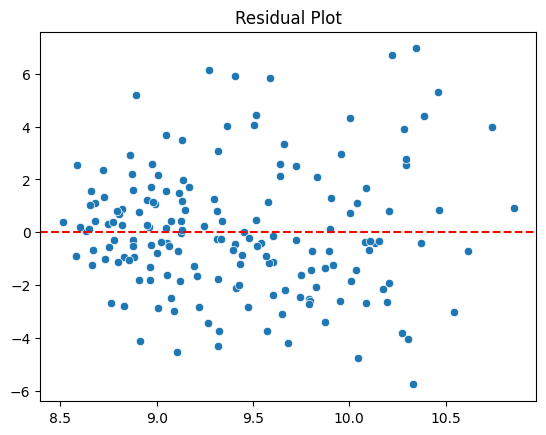

In [ ]:
predicted_values = results.fittedvalues

# Generate residuals
residuals = results.resid
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')

Our data is mostly homoscedastic, although there are some larger residuals that start to appear on the right side of the graph. Although we believe the data is still homoscedastic enough to use linear regression, this is an important limitation of the model to keep in mind. We will now plot a visualization for the regression line. 

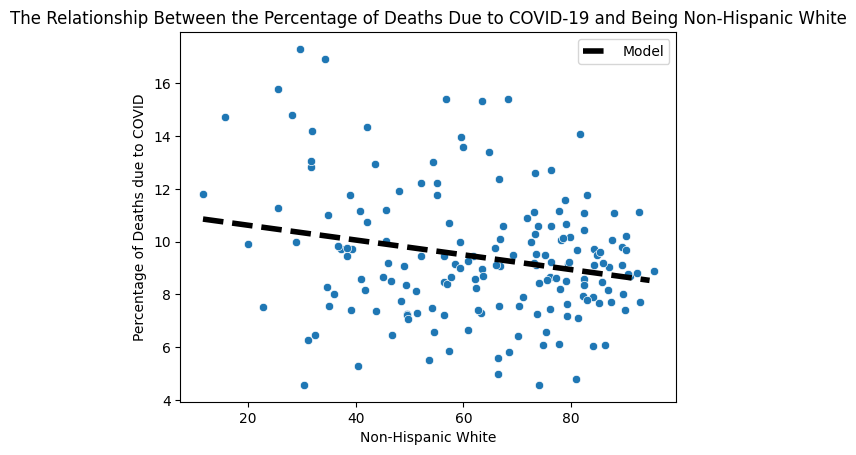

In [ ]:
# Recreate previous scatterplot
sns.scatterplot(data=reg_df, y='Portion of Deaths due to COVID', x='Non-Hispanic White')

# Plot the regression line
xs = np.arange(reg_df['Non-Hispanic White'].min(), reg_df['Non-Hispanic White'].max())
ys = -0.028 * xs + 11.18
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Non-Hispanic White')
plt.ylabel('Percentage of Deaths due to COVID')
plt.title('The Relationship Between the Percentage of Deaths Due to COVID-19 and Being Non-Hispanic White')
plt.legend();

Since the graph is roughly linear, it is possible to draw a line best fit. Although the relationship is not particularly strong, counties with a higher percentage of Whites dying from COVID-19 have less COVID-19 deaths relative to total deaths. We have confirmed our alternative hypothesis that being Non-Hispanic White has a significant difference on COVID-19 death rates.

##### Looking at Proportion of COVID Deaths and Hispanics: Linear Regression
Now when looking at the scatterplot for Hispanics and Proportion of COVID Deaths, we can we can see no linear relationship or line best fit. Thus a linear regression cannot be further analyzed for this racical category. This could be due many factors such as not enough data or simiply no relationship being present

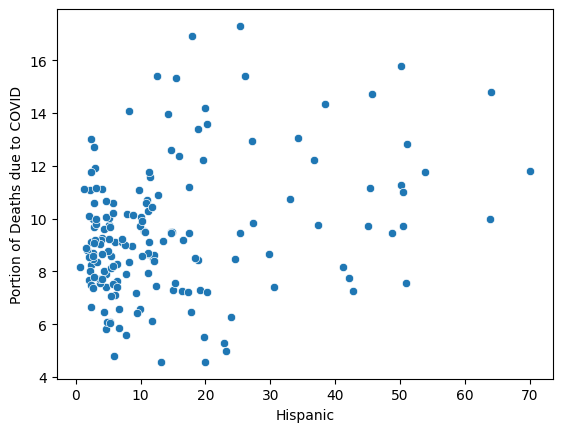

In [ ]:
# Unfortunately due to the heteroscedasticity of the data, we were unable to use a linear 
# regression model for COVID-19 death rates vs. Hispanic deaths due to COVID-19, 
# as seen below in the residual plot.
scatterplt = sns.scatterplot(data=reg_df, y='Portion of Deaths due to COVID', x='Hispanic')
#plt.xlabel('')

Text(0.5, 1.0, 'Residual Plot')

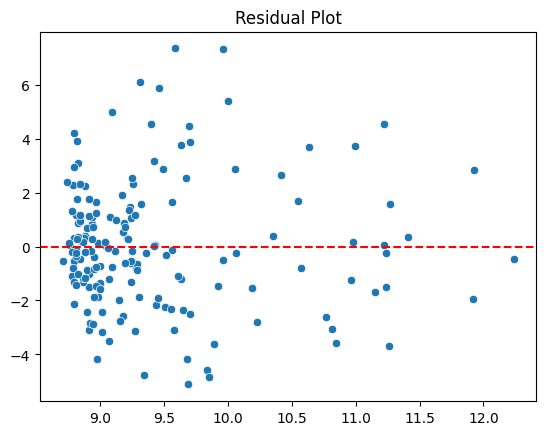

In [ ]:
# Create model
outcome, predictors = patsy.dmatrices('Q("Portion of Deaths due to COVID") ~ Q("Hispanic")', reg_df)
model = sm.OLS(outcome, predictors)

# Fit the model
results = model.fit()

predicted_values = results.fittedvalues

# Generate residuals
residuals = results.resid
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')

In summary, after reviewing the graphs for Non-Hispanic White and Hispanics, we refrain from drawing any definitive conclusions regarding the relationship between the proportion of COVID deaths and these racial categories. While there appears to be a slight linear trend in the graph for Non-Hispanic White, it lacks the strength needed to make conclusive assertions, particularly when addressing matters as significant as race. Considering the potential consequences of falsely assuming a relationship, it is important to exercise caution in drawing conclusions from this data and considering ethicality of our analysis. On the other hand, the graph for Hispanics shows a notably weak pattern with no discernible linear trend, leading us to withhold any conclusions and dismiss the presence of a relationship.

# Ethics & Privacy

We do not believe there would be issues regarding the confidentiality of patient/personal information as no names or specific data from one particular person would be used. All results were aggregated ensuring privacy at an individual level.

Moreover, our data is sourced from reputable organizations such as the Health data organization, which adheres to strict ethical and data collection guidelines. Overall we believe our findings could prove to be beneficial to prepare for another pandemic in the future. 

However, it is also very crucial to approach any correlations with caution, avoiding misrepresentation of certain groups/populations of people when dealing with such diseases. Especially when dealing with our dataset that includes some missing values for race categories in a few counties. To account for this, we remove counties that lack proper representation of groups and make sure to only include those who include these values. By addressing these issues earlier during our cleaning portion of the dataset we reduce biases before analyzing our data. In order to analyze COVID deaths more accurately, we added an additional column that takes the proportional deaths caused by COVID with the total. This makes our comparison from the West and East coast more ‘even’ as total COVID death might not be completely representative of a state/region if it carries a higher population (which in turn has a higher death total). 

Additionally, for our EDA portion, to make sure our data is indeed significant we did a t-test at every level of analysis (racial categories, urbanization level and West V.S. East coast) to make sure if there is a statistical relationship between these variables we are investigating. To reduce bias after creating graphs, we added captions and carefully explained why we made certain choices: like what data to include, show or talk about for our project. Additionally, we took particular care in our project to ensure that no group is unfairly "blamed" or misrepresented based on their race. Especially given the increasing incidents of Asian hate during the COVID-19 pandemic, we are committed to presenting the data impartially and avoiding prejudice against any group.
 


# Discussion and Conclusion

Initially, our research question started off broadly from various trends that we had heard about regarding minorities having a higher COVID-19 death rate than whites. Thus, initially, we looked for datasets with both racial proportions in the population and their associated death rate. However, once we started researching potential data, we discovered that there was accompanying information such as level of urbanization and also location in the United States that could confound our findings (a larger metro area might be more susceptible to COVID infections). Thus, we decided to expand our research question to include whether levels of urbanization affected COVID mortality rate. We also narrowed our data to only focus on East Coast and West Coast states to see if there was a difference between the two.

The data we ended up using was a dataset of COVID-19 deaths and total deaths over a 3 year timespan from January 2020 to September 2023 of counties in the United States along with a portion of racial information (i.e. White, Hispanic, Black etc.). In order to make sure our data was consistent, we removed many counties’ information as they had very incomplete racial information.

Our hypothesis was that based on external sources that we had read about before, we thought that counties with a higher portion of minorities would have higher COVID death rates and that counties classified as larger metros would also have higher COVID death rates.

We started our analysis by analyzing COVID death rates (versus total deaths during the time) were different in the East vs West coast, given our dataset, there was around a 2% higher portion of COVID deaths in the East Coast vs the West Coast. Furthering our analysis, we decided to see whether the levels of urbanization in these counties were causing this trend. While analyzing urbanization, we discovered that contrary to what we thought, larger metros actually tended to have lower rates of death. However, one interesting trend that we did see was that while smaller metros tended to have similar death rates on both coasts, Eastern Larger metros had a much higher death rate than west coast larger metros. We think that this might be due to the presence of many large East cities.

We now wanted to determine the relationship between racial background and COVID-19 death rates. We first started by conducting linear regression on the percentage of COVID-19 deaths that were from Non-Hispanic Whites and the COVID-19 death rates for each county. Our null hypothesis was that a higher percentage of deaths from Non-Hispanic Whites has no effect on COVID-19 death rates in a county. Our alternative hypothesis was that a higher percentage of deaths from Non-Hispanic Whites has a significant effect on COVID-19 death rates in a county. We first confirmed that our data was visually linear and homoscedastic enough to satisfy the conditions necessary for linear regression. We then generated a linear regression model and found a small but significant relationship between our variables. For every 1% increase of percentage of Non-Hispanic Whites in a county, there is a 0.028% decrease in COVID-19 death rate in a county. This indicates that counties that had more Non-Hispanic Whites had lower deaths overall compared to counties that had more racial minorities dying from COVID-19. However, when we tried to do the same analysis for the percentage of COVID-19 deaths that were from Hispanics vs COVID-19 death rates for each county, our data was too heteroscedastic to attempt fitting a model. 

Given our analysis for urbanization and racial background, we can conclude that our data cannot give us a conclusive answer on whether or not to support our hypothesis but with more data there is a possibility that we can just make sure to make this very apparent. In our findings, we find that there is a significant relationship between large levels of urbanization and the percentage of COVID-19 death rate, but an insignificant relationship for lower levels of urbanization. Unfortunately, due to the limitations of our data, we were unable to find a correlation between all racial backgrounds with the exception of Non-Hispanic White and Hispanic and the percentage of COVID-19 deaths. For Non-Hispanic White, we found that there was a negative relationship between the proportion of COVID-19 deaths and the percentage of COVID-19 deaths. For Hispanic, the data failed the homoscedasticity test, dissuading us from using linear regression due to a possibly inaccurate model. That being said, we end up partially answering our research question. We discovered that there is some correlation between urbanization and the COVID-19 mortality rate, such that the larger metros will have a higher COVID-19 mortality rate, but there is some uncertainty with smaller and medium metros. For the racial background portion of our research question, we cannot definitively answer it as there are many confounding variables that we did not consider as well as limitations of our dataset.

One of the limitations of our model was that even though our initial choice of our dataset was quite large, the racial data for each county was often incomplete or had different standards. Thus, to narrow down our counties to have enough racial data to analyze (white, hispanic, etc.), and also only from Eastern and Western Coastal States we only ended up with around 150 observations. Certain observations then might have had a larger impact on our findings, specifically in observing East vs West Coast. Thus, if we had more complete data for more counties across the country, perhaps our data would be more accurate. Also, although our analysis was meant to specifically look at race and urbanization along the coasts vs COVID rate, we acknowledge that this is mainly a question of correlation, not causation, as there are surely confounding variables, such as certain counties having less access to healthcare or less vaccinations which are more directly a cause than just race.

Our project will have an effect on society by showing if there is a correlation between racial proportions and COVID death rate importantly. We also wanted to show whether there is a relationship between urbanization and COVID death rate. While we didn’t see any very strong trends, we hope that our analysis does indicate that it is important for the government to respond to medical issues in certain areas especially based on risk factors such as counties with a high number of minorities.




# Team Contributions

Desmond Vu
- Helped facilitate meetings and addressed any potential issues as well as what needed to be completed.
- Contributed with the many of the writing portions of the project.
- Visualized and analyzed many of the graphs displayed throughout the project.

Kayla Maldonado
- Helped organize when to meet/project schedule
- Contributed to writing: abstract, geosptial map, west and east coast analysis
- Visualized the geospatial map

Alexander Gao
- brainstormed ideas and suggestions for project analysis during meetings
- contributed to writing conclusion and discussion of data cleaning and EDA
- wrote code for data cleaning, EDA visualizations and analysis 

Benjamin Hinnant
- Found dataset, wrote background, hypothesis, and research question
- Wrote code and analysis for linear regression
- Added to presentation and filmed relevant parts

Keshav Tiwari
- suggested and researched visualization methods to display data, conducted proofreading
- wrote code to shift and display data from county level data to state wide, coast wide data and urbanization data levels of granularity
- analysed visualizations and filmed the granularity analysis slides  